In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State the hypotheses <br>
-$H_0$: She cannot predict with any consistency beyond randomness <br>
-$H_1$: She can

Step 2: Test Statistic <br>
$X$: number of times she correctly picked tea first

Step 3: $p$-value <br>
$P(X\geq3)$

In [2]:
M,n,N = 8,4,4
print(stats.hypergeom.pmf([3,4],M,n,N).sum())
print(1 - stats.hypergeom.cdf(2,M,n,N))

0.24285714285714263
0.24285714285714288


Step 4: Conclude <br>
We fail to reject the null hypothesis

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State the hypotheses <br>
$H_0$: Equal mean sepal width between species <br>
$H_1$: Virginica has a larger mean than versicolor

Step 2: Test Statistic <br>
$X$: difference in sample means

Step 3: $p$-value <br>
If $H_0$ is true than there should be a uniform distribution

In [5]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [6]:
num_obs = iris_sub.num_rows
ts = []
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement = False).column(1))
    ts = np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

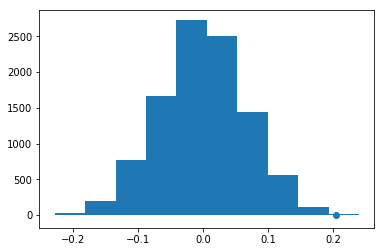

In [7]:
plt.hist(ts)
plt.scatter(obs,0)
plt.show()

In [8]:
np.mean(ts<=obs)

0.9995

Step 4: Conclude <br>
Fail to reject the null hypothesis